<a href="https://colab.research.google.com/github/yasykurrafii/Machine-Learning/blob/main/LinearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

<h1> Importing All Module That we need </h1>

the important module that we need are :
* Numpy
* Pandas
* Matplotlib
* Tensorflow

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

# Data

This section will take the data with format .csv from url with module Pandas

Pandas is very useful module to take data, and manipulate it. It will helpfull to cleaning the data.

In [ ]:
df_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # Training set
df_eval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # Evaluation set

y_train = df_train.pop('survived') # Target Set for Training set
y_eval = df_eval.pop('survived') # Target Set for evalutation set

Training set and Evalutaion set are seperated that will be usefull to avoid overfitting when we train our model Machine Learning. Other trick to seperate the data into training set and test set is using <i>train_test_split</i> from module scikit-learn (<i>sklearn.model_selection</i>)

## Look Insight of data with Pandas

With Pandas we can look the data and find the insight like mean, std, etc.

In [ ]:
df_train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


<i>DataFrame.head()</i> is using to look the 5 first row of the data. We can look at the feature and find the path of the data.

In [ ]:
df_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<i>DataFrame.describe()</i> will give you the insight of the data. It is very usefull to look the mean, std and so on.

In [ ]:
df_train.shape

(627, 9)

With <i>DataFrame.shape</i> we know this dataset has 627 rows with 9 columns

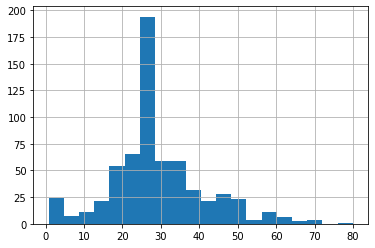

In [ ]:
df_train.age.hist(bins = 20)

Nice, Pandas give us the graph of the data from <i>age</i> column in <i>df_train</i> dataset with <i>Histogram Plot with 20 bins</i>

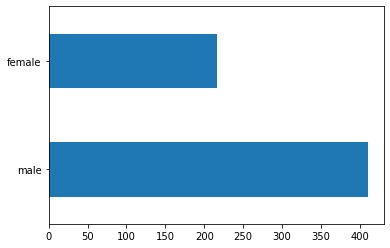

In [ ]:
df_train.sex.value_counts().plot(kind = 'barh')

Interesting, with <i>.value_counts()</i> we count the total data for each unique value, in this example <i>.value_counts()</i> counts the total data from sex female and male. We can use <i>.plot()</i> with kind <strong>horizontal bar</strong>

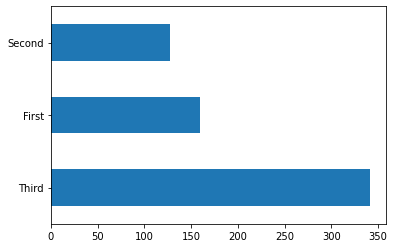

In [ ]:
df_train['class'].value_counts().plot(kind = 'barh')

There are two ways to choose the feature from the dataset. First, with <i>dataset.feature</i> and Second, <i>dataset['feature']</i> .

Text(0.5, 0, '% Survive')

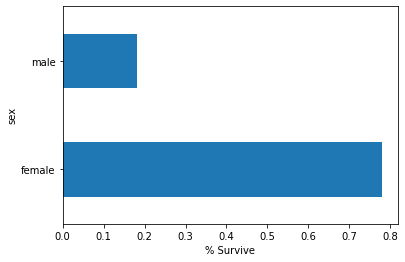

In [ ]:
pd.concat([df_train, y_train], axis = 1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('% Survive')

We Concat 2 dataframe, <i>df_train and y_train</i>, by grouping with <strong>sex</strong> and take the <i>mean</i> of <i>survived</i> by every <strong>sex</strong>.

Now, From this four graphs there are many information that we got:

1. Most of the Passengers are 20 to 30 years old
2. Most of the Passengers are male
3. Most of the Passengers are in the Third class
4. Female has more percentage to survive than male

# Train set and Test set

when we load the data we load 2 dataset, train set and test set. Why do we should seperated the data into train set and test set? We use it to avoid the Overfitting and underfitting. 

## Overfitting vs Underfitting

**Overfitting** is the condition when your model is good in train set but poor in test set, it is because your model is too complex

**Underfitting** is the condition when your model is too simple so it will not give you the good prediction.

**Overfitting Image**

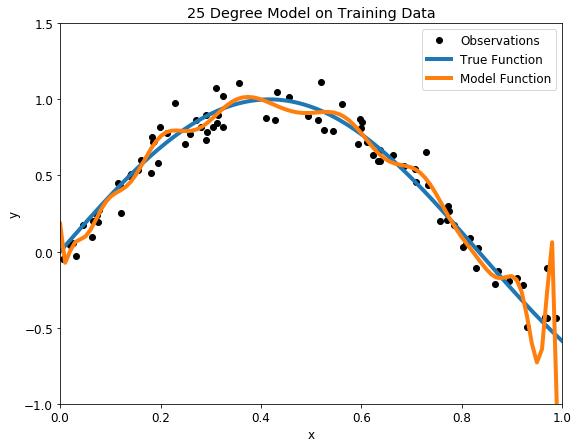


**Underfitting Image**

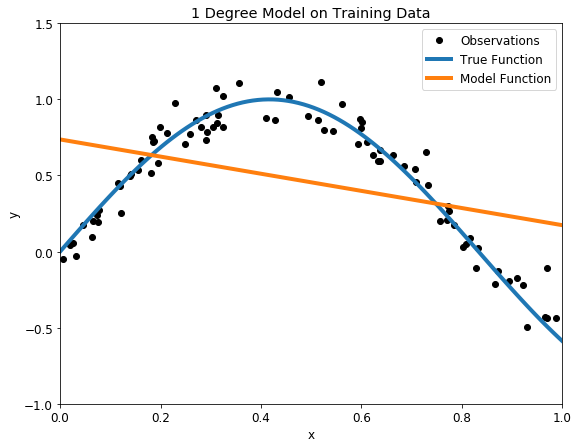

## Feature Column

Inside the dataset we have two types of features, **Numerical** and **Categorical**.

**Numerical** is when our features are fully of the number(ex Age, Fare) 

**Categorical** is when our features are fully of category (ex Sex, Class)

In [ ]:
# Checking the Categorical and Numerical
categorical = ['sex', 'class', 'embark_town', 'alone', 'parch', 'n_siblings_spouses', 'deck']
numerical = ['age', 'fare']

feature_column = []

for category in categorical:
  vocabulary = df_train[category].unique()
  feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(category, vocabulary))

for num in numerical:
  feature_column.append(tf.feature_column.numeric_column(num, dtype = tf.float32))

print(feature_column)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, def

# Training Proccess

## Input Function

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(df_train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(df_eval, y_eval, num_epochs=1, shuffle=False)

<function __main__.make_input_fn.<locals>.input_function>

## Make an Linear Classification

In [ ]:
estimator = tf.estimator.LinearClassifier(feature_columns=feature_column)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpun09hw5u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Training Model using training set

In [ ]:
estimator.train(train_input_fn)
result = estimator.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])

0.75757575


INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpun09hw5u/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


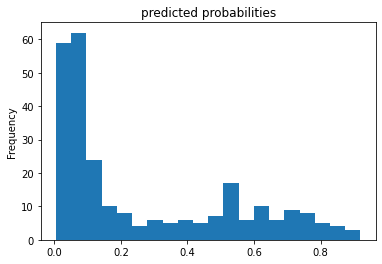

In [ ]:
pred_dicts = list(estimator.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')